# Trained using Random Forest

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_auc_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# read in the dataset
df = pd.read_csv('../Dataset/card-transaction-dataset.csv')

In [5]:
# encoding categorical data
y = df['Class']

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
print(Y[500:600])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [6]:
X = df.drop(labels = ['Time','Class'],axis=1)
print(X.head)

<bound method NDFrame.head of                V1         V2        V3        V4        V5        V6   
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388  \
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21   
0       0.239599  0.098698  0.

In [7]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
param_grid = {
    'max_features' : [1,2,3,4,5],
    'n_estimators' : [10,25,50,75,100]
}

In [18]:
from sklearn.model_selection import GridSearchCV

model = RF()
gs = GridSearchCV(model,param_grid,scoring='neg_log_loss',cv=5)
gs.fit(X,Y)
print('Best params: ',gs.best_params_)

Best params:  {'max_features': 2, 'n_estimators': 100}


# Elbow graph
With a parameter like the number of trees in a random forest, increasing the number of trees will never hurt performance. Increasing the number trees will increase performance until a point where it levels out.

In [9]:
n_estimators = list(range(25,101))
param_grid = {
    'n_estimators' : n_estimators
}
new_model = RF()
gs = GridSearchCV(new_model,param_grid,scoring='neg_log_loss',cv=5)
gs.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          34, 35, 36, 37, 38, 39, 40, 41, 42,
                                          43, 44, 45, 46, 47, 48, 49, 50, 51,
                                          52, 53, 54, ...]},
             scoring='neg_log_loss')

In [15]:
scores = gs.cv_results_['mean_test_score']

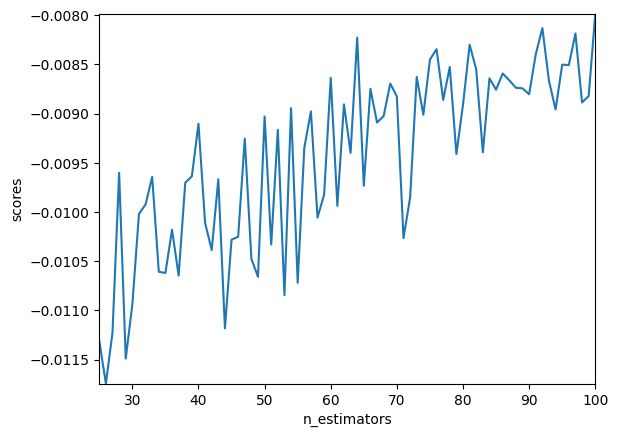

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(n_estimators,scores)
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.xlim(25,100)
plt.ylim(np.min(scores), np.max(scores))
plt.show()

In [12]:
# Split dataset into train test chucks
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=6)

In [17]:
rf_model = RF(n_estimators=100,max_features=2)
start = datetime.now()
rf_model.fit(X_train,Y_train)
stop = datetime.now()
train_time = stop - start
print("Training duration :",train_time)

Training duration : 0:04:39.474819


In [18]:
Y_pred = rf_model.predict(X_test)

[[56860     4]
 [   25    73]]
Precission : [0.99956052 0.94805195]
Recall : [0.99992966 0.74489796]
F1-score : [0.99974505 0.83428571]


<Axes: >

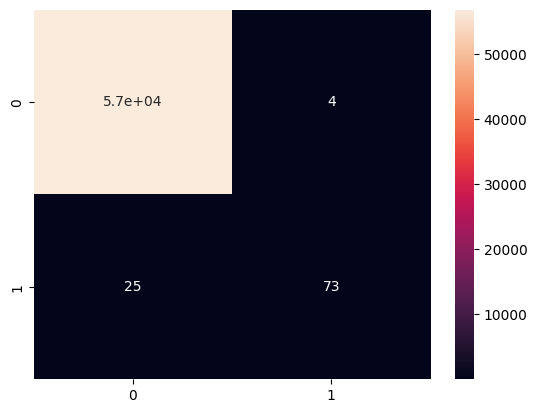

In [22]:
# create the confusion matrix
cf = confusion_matrix(Y_test,Y_pred)
print(cf)
precision,recall,fscore,_ = precision_recall_fscore_support(Y_test,Y_pred)
print("Precission :",precision)
print("Recall :",recall)
print("F1-score :",fscore)
sns.heatmap(cf,annot=True)